# Diabetes.ipynb

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split        # 데이터의 train, test로 나누는 데 사용됨
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
file_path = "E:/AI/week2/dataFrame/diabetes.csv"
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 데이터의 정보를 확인

In [91]:
df.keys()
# df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 데이터의 통계적 정보 확인

In [93]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 이상치를 확인하세요.

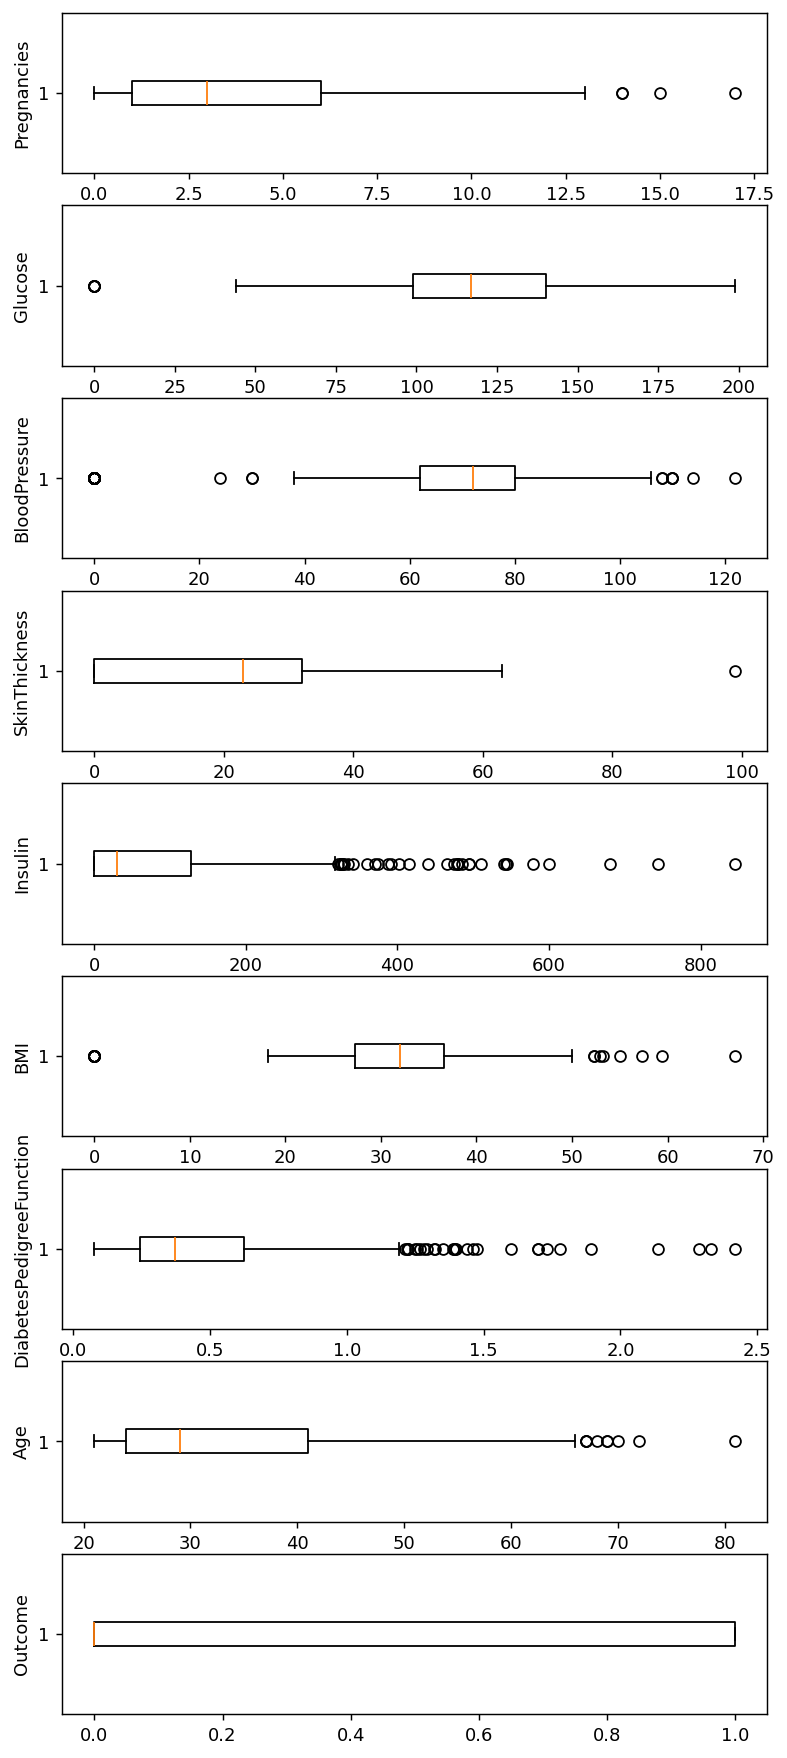

In [95]:
from matplotlib import pyplot as plt

# Box Plots
fig, axs = plt.subplots(9,1,dpi=130, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()


### 이상치 삭제

In [96]:
import numpy as np

def remove_outliers(df, columns, factor=1.5):
    """
    특정 열에서 IQR(사분위수 범위) 방법을 사용하여 이상치를 제거하는 함수
    :param df: 데이터프레임
    :param columns: 이상치를 제거할 열 목록
    :param factor: IQR에 곱할 값 (기본값: 1.5)
    :return: 이상치가 제거된 데이터프레임
    """
    for col in columns:
        q1, q3 = np.percentile(df[col], [25, 75])  # 1사분위수(Q1)와 3사분위수(Q3) 계산
        iqr = q3 - q1  # IQR 계산
        lower_bound = q1 - (factor * iqr)  # 하한값 계산
        upper_bound = q3 + (factor * iqr)  # 상한값 계산
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # 이상치 제거
    return df

# 이상치를 제거할 열 목록
columns_to_filter = ["Insulin", "Pregnancies", "Age", "Glucose", "BMI", "DiabetesPedigreeFunction"]

# IQR 필터링 적용 (factor = 1.5)
clean_data = remove_outliers(df, columns_to_filter, factor=1.5)

# BloodPressure(혈압) 열은 factor = 0.75 사용
clean_data = remove_outliers(clean_data, ["BloodPressure"], factor=0.75)


### 상관관계

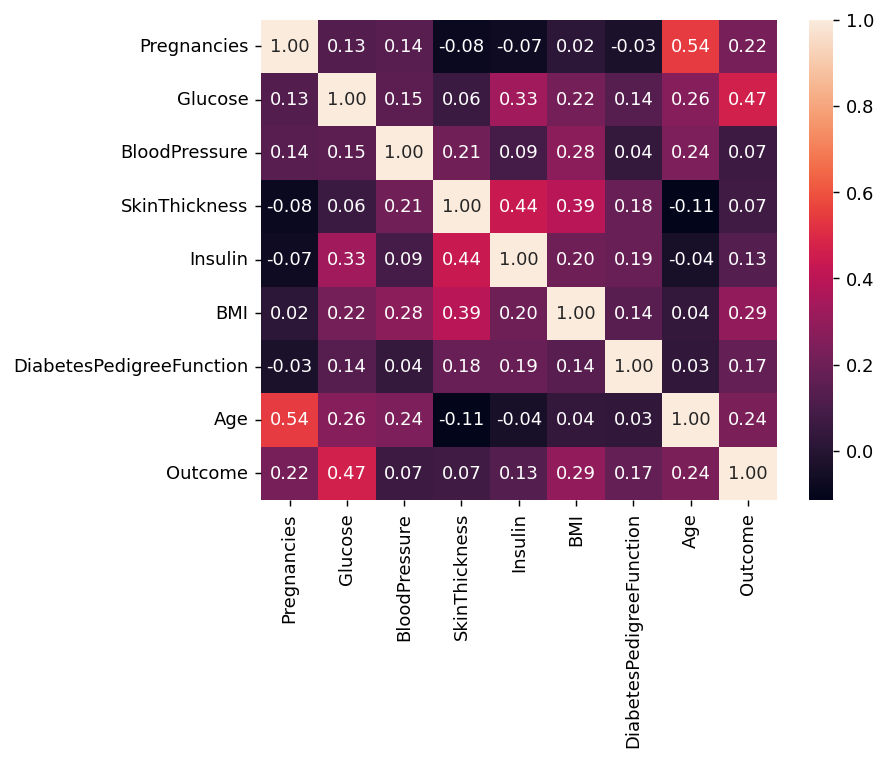

In [97]:
#correlation
import seaborn as sns
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()


In [98]:
# 내림차순으로 단일 열을 기준으로 비교할 수도 있음
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Check Outcomes Proportionality

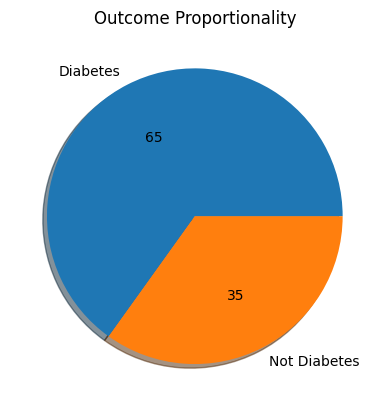

In [99]:
plt.pie(df.Outcome.value_counts(),
        labels= ['Diabetes', 'Not Diabetes'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()


### 데이터를 분할

In [100]:
# separate array into input and output components
X = df.drop(columns =['Outcome'])
y = df.Outcome


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 데이터 정규화

In [102]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.52639686, -1.15139792, -3.75268255, -1.32277365, -0.70120553,
        -4.13525578, -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485,  0.23350519, -0.70120553,
        -0.48916881,  2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , -0.09071957,  0.01344832,
        -0.42452187,  0.54916055, -0.94893896],
       [-1.13052335,  1.2541786 , -1.04961706, -1.32277365, -0.70120553,
        -1.30372015, -0.63929127,  2.79212217],
       [ 0.68185612,  0.41066475,  0.57222224,  1.07648956,  2.48460077,
         1.83812075, -0.68682934,  1.13909516]])

## # Decision Tree (DT) 분류

In [103]:
dt_model = DecisionTreeClassifier(random_state=42)  # 모델을 초기화하고, 랜덤 시드를 42로 설정
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f} \n")

def line():
    print("-"*100)

print("실제 값 (y_test):\n", y_test.values)
line()
print("예측 값 (y_pred_dt):\n", y_pred_dt)

Decision Tree Accuracy: 0.7468 

실제 값 (y_test):
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
----------------------------------------------------------------------------------------------------
예측 값 (y_pred_dt):
 [1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


## # Random Forest (RF) 분류

In [104]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")
print("실제 값 (y_test):\n", y_test.values)
line()
print("예측 값 (y_pred_rf):\n", y_pred_rf)

Random Forest Accuracy: 0.7208

실제 값 (y_test):
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
----------------------------------------------------------------------------------------------------
예측 값 (y_pred_rf):
 [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


## # Logistic Regression (LR) 분류

In [105]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}\n")
print("실제 값 (y_test):\n", y_test.values)
line()
print("예측 값 (y_pred_lr):\n", y_pred_lr)

Logistic Regression Accuracy: 0.7532

실제 값 (y_test):
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
----------------------------------------------------------------------------------------------------
예측 값 (y_pred_lr):
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


## # Support Vector Machine (SVM) 분류

In [106]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}\n")
print("실제 값 (y_test):\n", y_test.values)
line()
print("예측 값 (y_pred_svm):\n", y_pred_svm)

SVM Accuracy: 0.7338

실제 값 (y_test):
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
----------------------------------------------------------------------------------------------------
예측 값 (y_pred_svm):
 [0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


## # K-Nearest Neighbors (KNN) 분류

In [107]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}\n")
print("실제 값 (y_test):\n", y_test.values)
line()
print("예측 값 (y_pred_knn):\n", y_pred_knn)

KNN Accuracy: 0.6948

실제 값 (y_test):
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
----------------------------------------------------------------------------------------------------
예측 값 (y_pred_knn):
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]
